# Principal Component Analysis (PCA)
This notebook implements a PCA - first from scratch (part 1) and then using sklearn (part 2).

## Part 1: PCA from scratch
The following section is based on: 
- code: https://medium.com/@raghavan99o/principal-component-analysis-pca-explained-and-implemented-eeab7cb73b72 
- theory: https://towardsdatascience.com/the-mathematics-behind-principal-component-analysis-fff2d7f4b643

In [1]:
# import packages
import numpy as np
np.random.seed(1)

### Step 1: 
Take the whole dataset consisting of d+1 dimensions and ignore the labels such that our new dataset becomes d dimensional. 

In [2]:
# generate random data in 3 dimensions with 2 classes (20 samples per class)

vec1 = np.array([0, 0, 0])
mat1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])    # np.eye(3) 
sample_for_class1 = np.random.multivariate_normal(vec1, mat1, 20).T

vec2 = np.array([1, 1, 1])
mat2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
sample_for_class2 = np.random.multivariate_normal(vec2, mat2, 20).T

all_data = np.concatenate((sample_for_class1, sample_for_class2), axis=1)

In [3]:
# let's check the dimensionality of the data
sample_for_class1.shape, sample_for_class2.shape, all_data.shape

((3, 20), (3, 20), (3, 40))

In [ ]:
#  center the data (as it is done in sklearn) --> makes no big difference
#all_data_centered = np.array([all_data[0] - np.mean(all_data[0, :]),
#                              all_data[1] - np.mean(all_data[1, :]),
#                              all_data[2] - np.mean(all_data[2, :])])
#all_data = all_data_centered

### Step 2:
Compute the mean for every dimension of the whole dataset.

In [43]:
# get mean for each of the 3 dimensions
mean_dim1 = np.mean(all_data[0, :])
mean_dim2 = np.mean(all_data[1, :])
mean_dim3 = np.mean(all_data[2, :])
mean_vector = np.array([[mean_dim1], [mean_dim2], [mean_dim3]])
print('The Mean Vector:\n', mean_vector)

The Mean Vector:
 [[0.41667492]
 [0.69848315]
 [0.49242335]]


### Step 3:
Compute the covariance matrix of the whole dataset.

In [45]:
# to perform the PCA, we need to compute the scatter matrix (covariance matrix) of the data (loop over dimensions)

scatter_matrix = np.zeros((3,3))
for i in range(all_data.shape[1]):
    scatter_matrix += (all_data[:, i].reshape(3, 1) - mean_vector).dot((all_data[:, i].reshape(3, 1) - mean_vector).T)
print('The Scatter Matrix is:\n', scatter_matrix)

The Scatter Matrix is:
 [[38.4878051  10.50787213 11.13746016]
 [10.50787213 36.23651274 11.96598642]
 [11.13746016 11.96598642 49.73596619]]


### Step 4:
Compute eigenvectors and the corresponding eigenvalues.

In [5]:
# use the numpy library to compute the eigenvectors and eigenvalues based on the scatter matrix

eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)
eig_val_sc, eig_vec_sc

(array([65.16936779, 32.69471296, 26.59620328]),
 array([[-0.49210223, -0.64670286,  0.58276136],
        [-0.47927902, -0.35756937, -0.8015209 ],
        [-0.72672348,  0.67373552,  0.13399043]]))

In [42]:
# let's verify that numpy returns eigenvectors in unit length
for ev in eig_vec_sc:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

In [6]:
# we make a list of tuples containing (eigenvalue, eigenvector) pairs
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]
eig_pairs

[(65.16936779078195, array([-0.49210223, -0.47927902, -0.72672348])),
 (32.69471296321796, array([-0.64670286, -0.35756937,  0.67373552])),
 (26.596203282097097, array([ 0.58276136, -0.8015209 ,  0.13399043]))]

### Step 5:
Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a d × k dimensional matrix W.

In [ ]:
# we then sort the list of tuples by the eigenvalue (largest first)
eig_pairs.sort(key=lambda x: x[0], reverse=True)
eig_pairs

In [7]:
# we verify that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

65.16936779078195
32.69471296321796
26.596203282097097


In [8]:
# we now choose the k largest eigenvectors and arrange them in a d*k matrix (here: 3*2 matrix):

matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.49210223 -0.64670286]
 [-0.47927902 -0.35756937]
 [-0.72672348  0.67373552]]


### Step 6:
Use this d × k eigenvector matrix to transform the samples onto the new subspace.

In [9]:
# we now transform the original data by this eigenvector matrix to obtain the transformed sample with k=2 dimensions

transformed = matrix_w.T.dot(all_data)
transformed.shape

(2, 40)

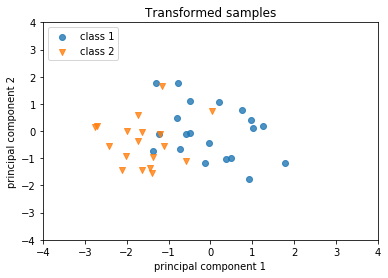

In [33]:
# plot transformed samples for both classes

import matplotlib.pyplot as plt
plt.scatter(transformed[0,:20], transformed[1,:20], marker='o', alpha=0.8)
plt.scatter(transformed[0,21:], transformed[1,21:], marker='v', alpha=0.8)
plt.legend(labels=['class 1', 'class 2'], loc=2)
plt.title('Transformed samples')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.xlim(-4,4)
plt.ylim(-4,4);

In [23]:
# transformed1 = matrix_w.T.dot(sample_for_class1)
# transformed2 = matrix_w.T.dot(sample_for_class2)

#plt.scatter(transformed1[0], transformed1[1], marker='o', alpha=0.8)
#plt.scatter(transformed2[0], transformed2[1], marker='v', alpha=0.8)
#plt.legend(labels=['class 1', 'class 2'], loc=2)
#plt.title('Transformed samples')
#plt.xlabel('principal component 1')
#plt.ylabel('principal component 2')
#plt.xlim(-4,4)
#plt.ylim(-4,4);

## Part 2: PCA with sklearn

In [39]:
# compare the result to the PCA from sklearn

from sklearn.decomposition import PCA

pca = PCA(n_components=2)   # , whiten=True)
pca.fit(all_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [40]:
pca.transform(all_data)

array([[-2.88360782, -3.45690078],
       [-1.83254462,  4.01173195],
       [ 4.71615243, -0.55483116]])

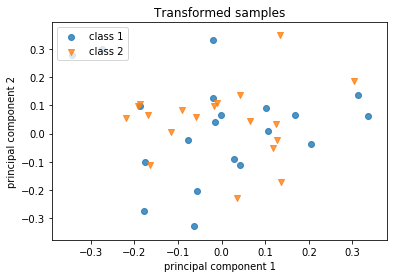

In [36]:
# plot the transformed data --> why not the same as above?
import matplotlib.pyplot as plt

plt.scatter(pca.components_[0,:20], pca.components_[1,:20], marker='o', alpha=0.8)
plt.scatter(pca.components_[0,21:], pca.components_[1,21:], marker='v', alpha=0.8)
plt.legend(labels=['class 1', 'class 2'], loc=2)
plt.title('Transformed samples')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2');